# Pré Requisitos

## 0.1 Loss Function

- Mede a distância entre o valor estimado e seu valor real. Um exemplo de Loss Function é o Mean Squared Error, que é usado em problemas de Regressão Multivariada

<img src="fig/MSE.png">

<img src="fig/regression.png">

_PERGUNTA: Alguém sabe uma outra forma de "fit" uma reta sem usar Ordinary Least Squares (Mínimos Quadrados)?_ 

## 0.2 Gradient Descent

Se ao invés de usar o OLS para encontrar a reta, nós chutamos um reta qualquer e ao pouco tentar chegar perto da reta estimada pelo OLS. 

Chutar uma reta qualquer significa chutar um valor para Beta0 (intercept) e Beta1 (inclinação).

Então teoriacemnte se chutasseos todas as retas possíveis seriamos capaz de construir um gráfico do tipo Heat Map onde Beta0 e Beta1 são os eixos x/y e Erro produzido pelo par (Beta0,Beta1) é verde se for baixo e vermelho se for alto.

<img src="fig/gradient_descent.png">

_PERGUNTA: Porque usar o Gradient Descent se eu posso usar OLS e resolver analiticamente?_

https://www.youtube.com/watch?v=umAeJ7LMCfU

## 0.3 Regularization

### 0.3.1 Ridge Regression

<img src="fig/ridge.gif">

### 0.3.2 Lasso Regression

<img src="fig/lasso.png">

# Ensemble Methods

## 1.2 Boosting

![alt text](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg "Bulls Eye")

__Motivação:__
- Reduzir o bias criando múltiplos modelos especialistas partes diferentes do domínio das variáveis explanatórias

__Como:__

- Treinando modelos sequencialmente e após cada iteração identificando as observações que não obtiveram uma previsão acurada e dá maior enfoque à elas no modelo subsequente.
- Usaremos os modelos de todas as iterações para criar um modelo único.
- Each classifier specializes on a particular subset of examples

**Prós:**
- Como é pensado para reduzir o viés, geralmente os algoritmos de Boosting nos dão previsões melhores.
- Em geral produz resultados com baixa variância mesmo sem ser este o seu foco, mas como nem sempre isso é verdade deve-se ficar atento para overfitting.

**Contras**
- O Método não funciona tão bem para amostras pequenas
- Não é paralelizável

## 1.2.1 AdaBoost (Adaptive Boosting)

<img src="fig/Boosting_idea.png">

- The weight of each learner is learned by whether it predicts a sample correctly or not.

__Pseudo Algoritmo__

- adaptive boosting changes the sample distribution by modifying the weights attached to each of the instances.

- It increases the weights of the wrongly predicted instances and decreases the ones of the correctly predicted instances.

- The weak learner thus focuses more on the difficult instances

- After being trained, the weak learner is added to the strong one according to his performance (so-called alpha weight). The higher it performs, the more it contributes to the strong learner


- We have T different classifiers ht
- weight wt of the classifier is proportional to its accuracy on the training set

- wt = log( 1 / β ) = log (1 − ε ) / ε

In [1]:
import math
e = 0.1
math.log((1 - e)/e)

2.1972245773362196

Para quem quiser ver uma implementação de Adaboost Classifier usando Decision Trees: __[adaboost_from_scratch](https://github.com/fformenti/Adaboost/blob/master/adaboost.py)__

### 1.2.1.1 AdaBoost Regression

https://alliance.seas.upenn.edu/~cis520/wiki/index.php?n=lectures.boosting

AdaBoost training process selects only those features known to improve the predictive power of the model, reducing dimensionality and potentially improving execution time as irrelevant features do not need to be computed.

__Principais argumentos que o Adaboost Regression recebe__
- n_estimador: Número de modelos. (Tipicamente quanto maior melhor)
- learning rate: 
- loss: Função que determina a atualização no peso das amostras

#### Boosting na prática

Vamos usar o dataset de housing prices que está disponivel neste __[link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data)__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV 

pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline  

/Users/felipeformenti/.venvs/tera_boosting/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/felipeformenti/.venvs/tera_boosting/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
hp = pd.read_csv('data/house_prices.csv')

In [4]:
hp.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

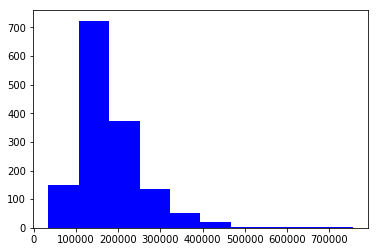

In [6]:
plt.hist(hp.SalePrice, color='blue')
plt.show()

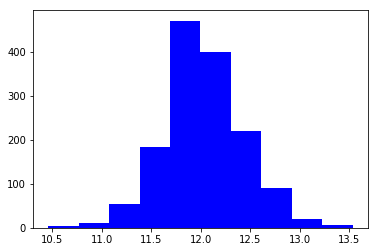

In [7]:
plt.hist(np.log(hp.SalePrice), color='blue')
plt.show()

In [8]:
#hp.LotFrontage.unique()

__Data Treatment__

In [9]:
# Removing Nulls
# df = hp[pd.notnull(hp['GarageQual'])]

__Feature Engineering__

In [10]:
# Has Pool
hp['has_pool'] = np.where(hp['PoolArea'] > 0, 1,0)

__Imputation__

In [11]:
#filling NA's with the mean of the column:
hp['LotFrontage'] = hp['LotFrontage'].fillna(hp['LotFrontage'].mean())

In [12]:
# # Watch out for this!!!
# a = DataFrame({'x': [1,2]})
# b = a[0:1]
# b.x = -1
# print(b)

In [13]:
df = hp.copy()

In [14]:
# Isolate Response variable and Drop unwanted columns
X_keep = ['LotArea','has_pool','YrSold','OverallQual','OverallCond']
response_variable = 'SalePrice'

X = df[X_keep]
y = df[response_variable]

In [15]:
y = np.log(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=28)

In [17]:
adr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=300, random_state=28)
adr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=28)

In [18]:
# Predict
y_pred = adr.predict(X_test)
mse = metrics.mean_squared_error(y_pred, y_test)
mae = metrics.mean_absolute_error(y_pred, y_test)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)

MSE: 0.0558
MAE: 0.1765


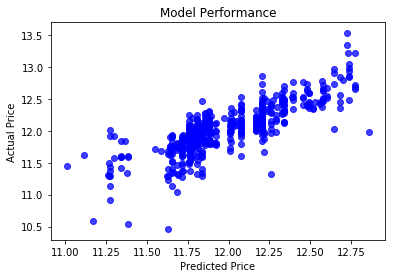

In [22]:
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model Performance')
plt.show()

In [23]:
importances = adr.feature_importances_
feature_names = X_test.columns
n = 5

In [24]:
def plot_feature_importance(importances, feature_names, n):
    indices = np.argsort(importances)[::-1][:n]
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(10,6)
    plt.title("Feature importances", fontsize = 16)
    xlabels = [feature_names[int(i)] for i in indices]
    plt.bar(range(n), importances[indices],
            color="#799DBB",  align="center")
    plt.grid()
    plt.xticks(range(n), xlabels, rotation=90)
    plt.xlim([-1, n])
    plt.ylim([0, min(1, max(importances[indices]+0.0005))])
    plt.xlabel('Features', fontsize = 14)
    plt.ylabel('Feature Importance', fontsize = 14)
    plt.title('Variable Importance')
    plt.show()

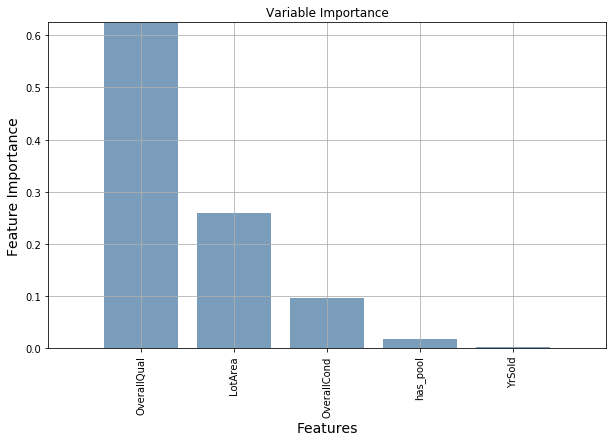

In [25]:
plot_feature_importance(importances, feature_names, n)

__MAKING A SUBMISSION__

In [43]:
test = pd.read_csv('data/house_prices_test.csv')

In [44]:
# Has Pool
test['has_pool'] = np.where(test['PoolArea'] > 0, 1,0)

In [45]:
X_pred = test[X_keep]

In [46]:
predictions = adr.predict(X_pred)

In [47]:
final_predictions = np.exp(predictions)

In [48]:
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = final_predictions

In [49]:
submission.to_csv('submission_adr.csv', index=False)

### 1.2.2. Gradient Boosting

http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

https://www.youtube.com/watch?v=sRktKszFmSk&t=71s

https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf

__Como difere do Adaboost:__
- Ao invés de atribuir pesos baseados nos erros de cada amostras o Gradient Boosting usa o erro resultante do strong learner como dado de entrada para o modelo seguinte (weak learned).
- O multiplicar referente ao weak learner não é função do seu poder de previsão da amostra. Ele é calculado pelo processo de otimização do Gradient Descent.

**Idéia**

- A idéia é fazer com que cada novo modelo tente capturar os erros dos modelos anteriores a ele

Esse video trás uma compreenssão gráfica de como cada modelo tenta capturar o error modelo principal (Strong Learner), e como é feita o split de cada árvore na tentativa de minimizar o erros dos residuos (o que é basicamente a descrição verbal do processo de Gradient Descent)

https://www.youtube.com/watch?v=sRktKszFmSk&t=236s

In [50]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state': 28}

gbr = GradientBoostingRegressor(**params)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mse = metrics.mean_squared_error(y_pred, y_test)
mae = metrics.mean_absolute_error(y_pred, y_test)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)

MSE: 0.0490
MAE: 0.1582


In [51]:
params_grid = {'n_estimators': [50, 100, 300, 500], 'max_depth': [2,3,4]}
gsearch = GridSearchCV(estimator = gbr, param_grid = params_grid, n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.38320, std: 0.02495, params: {'max_depth': 2, 'n_estimators': 50},
  mean: 0.54869, std: 0.03491, params: {'max_depth': 2, 'n_estimators': 100},
  mean: 0.72030, std: 0.03428, params: {'max_depth': 2, 'n_estimators': 300},
  mean: 0.74325, std: 0.03461, params: {'max_depth': 2, 'n_estimators': 500},
  mean: 0.42821, std: 0.02394, params: {'max_depth': 3, 'n_estimators': 50},
  mean: 0.60224, std: 0.02995, params: {'max_depth': 3, 'n_estimators': 100},
  mean: 0.73390, std: 0.03615, params: {'max_depth': 3, 'n_estimators': 300},
  mean: 0.73905, std: 0.03716, params: {'max_depth': 3, 'n_estimators': 500},
  mean: 0.44862, std: 0.02390, params: {'max_depth': 4, 'n_estimators': 50},
  mean: 0.62202, std: 0.02972, params: {'max_depth': 4, 'n_estimators': 100},
  mean: 0.73060, std: 0.04038, params: {'max_depth': 4, 'n_estimators': 300},
  mean: 0.72808, std: 0.04481, params: {'max_depth': 4, 'n_estimators': 500}],
 {'max_depth': 2, 'n_estimators': 500},
 0.7432489200534269)

In [52]:
best_params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state': 28}

In [53]:
gbr = GradientBoostingRegressor(**best_params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=28,
             subsample=1.0, verbose=0, warm_start=False)

In [54]:
y_pred = gbr.predict(X_test)
mse = metrics.mean_squared_error(y_pred, y_test)
mae = metrics.mean_absolute_error(y_pred, y_test)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)

MSE: 0.0463
MAE: 0.1561


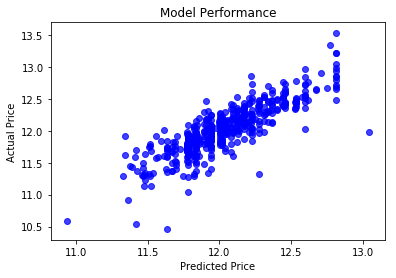

In [55]:
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model Performance')
plt.show()

__MAKING A SUBMISSION__

In [56]:
X_pred = test[X_keep]
predictions = adr.predict(X_pred)
final_predictions = np.exp(predictions)
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = predictions
submission.to_csv('submission_gbr_gridsearch.csv', index=False)

### 1.2.3 XGBoost (Extreme Gradient Boosting ou Regularized Boosting)

__Como difere do Gradient Descent:__

- Introduz regularização na Loss Function.
- Não é um algoritmo guloso.
- Possui cross validation em cada iteração.


**Prós**
- Alto poder de previsão (Maior que Adaboost e Gradient Boosting)
- Reduz overfiiting por utilizar regularização na Loss Function.
- Processamento Paralelo

**Parâmetros mais importantes**

- lambda: Responsável por atuar na regularização da Loss Function. A regularização é análoga a de Ridge
- alpha: Responsável por atuar na regularização da Loss Function. A regularização é análoga a de Lasso
- objective: Determina qual a sua Loss Function
- eta: É analogo ao learning rate, ou seja, o passo que o algoritmo caminha pela superfície da Loss Function
- max_depth: Mesmo que GBM
- booster: Tipo de modelo que será rodado em cada iteração (opções: gbtree: tree-based models, gblinear: linear models)

### 1.2.3.1 XGBoost Regression

In [57]:
from xgboost.sklearn import XGBRegressor

In [58]:
model_xgb = XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100,
                             reg_alpha=0.4, reg_lambda=0.4,subsample=0.5213)

In [59]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.4, reg_lambda=0.4, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5213)

In [60]:
y_pred = model_xgb.predict(X_test)

In [61]:
mse = metrics.mean_squared_error(y_pred, y_test)
mae = metrics.mean_absolute_error(y_pred, y_test)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)

MSE: 0.0502
MAE: 0.1683


In [62]:
params_grid = {'n_estimators': [50, 100, 300, 500], 'max_depth': [2,3,4], 'learning_rate': [0.05,0.03]}
gsearch = GridSearchCV(estimator = model_xgb, param_grid = params_grid, n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: -4.50561, std: 0.65853, params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50},
  mean: 0.70833, std: 0.02938, params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100},
  mean: 0.74209, std: 0.03422, params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300},
  mean: 0.73560, std: 0.03512, params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 500},
  mean: -4.50342, std: 0.66123, params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50},
  mean: 0.70815, std: 0.03164, params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100},
  mean: 0.73371, std: 0.03501, params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300},
  mean: 0.72273, std: 0.03886, params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500},
  mean: -4.50297, std: 0.66116, params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 50},
  mean: 0.70658, std: 0.03304, params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimator

In [65]:
best_params = {'n_estimators': 500, 'max_depth': 2, 'learning_rate': 2,
          'reg_alpha': 0.01, 'reg_lambda': 0.02, 'random_state': 28}

In [66]:
model_xgb = XGBRegressor(**best_params)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=2, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=28,
       reg_alpha=0.01, reg_lambda=0.02, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

__SUBMIT TO KAGGLE__

In [ ]:
# ALUNOS

### 1.2.3.2 XGBoost Classifier

In [67]:
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams

In [68]:
kobe = pd.read_csv('data/kobe.csv')
df = kobe[pd.notnull(kobe['shot_made_flag'])]
df["shot_zone_range"] = df["shot_zone_range"].astype('category')
df["shot_zone_range_code"] = df["shot_zone_range"].cat.codes
df = pd.get_dummies(df, columns=["combined_shot_type"], prefix = '', prefix_sep='')

In [69]:
def get_minutes_remaing(period, minutes):
    if period < 5:
        return 12*(4-period) + minutes
    else:
        return minutes

In [70]:
df['game_minutes_remaing'] = df.apply(lambda x: get_minutes_remaing(x['period'], x['minutes_remaining']), axis=1)
# Isolate Response variable and Drop unwanted columns
X_keep = ['shot_distance','seconds_remaining','game_minutes_remaing','playoffs','shot_zone_range_code','Bank Shot','Dunk', 'Hook Shot', 'Jump Shot', 'Layup', 'Tip Shot']
response_variable = 'shot_made_flag'

X = df[X_keep]
y = df[response_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
model_xgb = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,
                     colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,random_state=28)

In [72]:
#model_xgb.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
model_xgb.fit(X_train, y_train,eval_metric='auc')

#Predict training set:
y_pred = model_xgb.predict(X_train)
y_pred_prob = model_xgb.predict_proba(X_train)[:,1]

print("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_pred_prob))

/Users/felipeformenti/.venvs/tera_boosting/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.7325
AUC Score (Train): 0.817410


In [73]:
X_keep

['shot_distance',
 'seconds_remaining',
 'game_minutes_remaing',
 'playoffs',
 'shot_zone_range_code',
 'Bank Shot',
 'Dunk',
 'Hook Shot',
 'Jump Shot',
 'Layup',
 'Tip Shot']

Text(0,0.5,'Feature Importance Score')

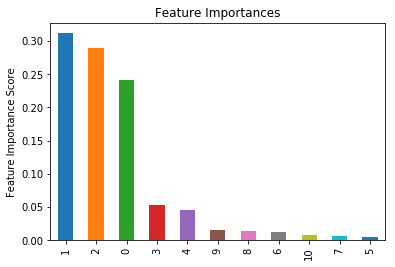

In [77]:
#feat_imp = pd.Series(model_xgb.booster().get_fscore()).sort_values(ascending=False)
feat_imp = pd.Series(model_xgb.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [80]:
param_test1 = {
 'max_depth': [2,4],
 'learning_rate':[0.1, 0.07]
}

In [81]:
model_xgb = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, 
              colsample_bytree=0.8, objective= 'binary:logistic', scale_pos_weight=1, seed=27)

In [82]:
gsearch1 = GridSearchCV(estimator = model_xgb, param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [83]:
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.62556, std: 0.00348, params: {'learning_rate': 0.1, 'max_depth': 2},
  mean: 0.62046, std: 0.00426, params: {'learning_rate': 0.1, 'max_depth': 4},
  mean: 0.62581, std: 0.00285, params: {'learning_rate': 0.07, 'max_depth': 2},
  mean: 0.62354, std: 0.00289, params: {'learning_rate': 0.07, 'max_depth': 4}],
 {'learning_rate': 0.07, 'max_depth': 2},
 0.6258110536964023)

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/